# Assignment 2 – Normalization Methods

1. Generate three variables (B, I, H) with 10,000 samples each:
   - **B:** Gaussian distribution (mean = 5, sd = 2)
   - **I:** Power law distribution (using `scipy.stats.powerlaw` with parameter a = 0.3)
   - **H:** Geometric distribution (with probability p = 0.005)
2. Compare the original variables using a box plot.
3. Apply various normalization methods:
   - Divide each variable by max
   - Divide variable by sum of its values
   - Convert each variable into z score using respective mean and sd
   - For each variable, convert the values in percentiles
   - Make medians of all the variables same
     * i. Calculate median of each variable 
     * ii. Calculate mean of these medians say m1 
     * iii. Generate a mulƟplier for each of the variables so that median value of each variable becomes m1
   - Quantile normalize the data using off the shelf library funcƟon

4. For each of the above method,  
   * i. Compare original distribution with its normalized version in single histogram 
   * ii. Compare all the normalized variables in single box plot

In [1]:
# Install the libraries
%pip install numpy scipy matplotlib scikit-learn pandas

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw, geom, norm
from sklearn.preprocessing import quantile_transform


# For reproducibility
np.random.seed(42)

# Ensure plots display in the notebook
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1. Generate Three Variables (10,000 Samples Each)

- **B:** Gaussian distribution (mean = 5, sd = 2)
- **I:** Power law distribution (a = 0.3)
- **H:** Geometric distribution (p = 0.005)

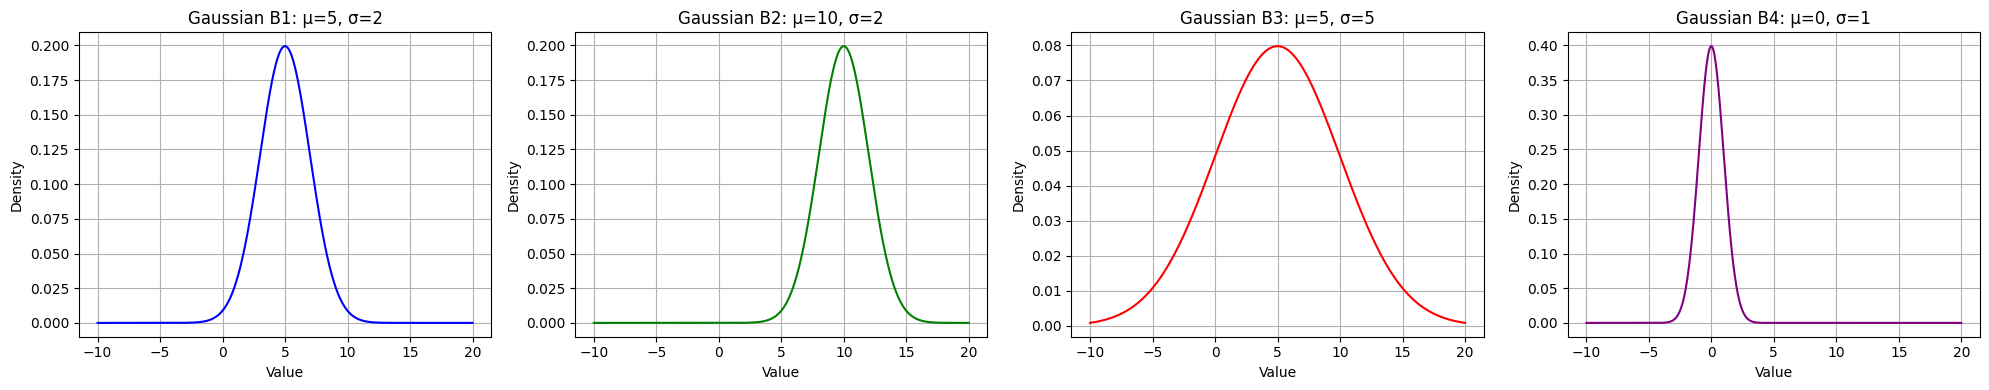

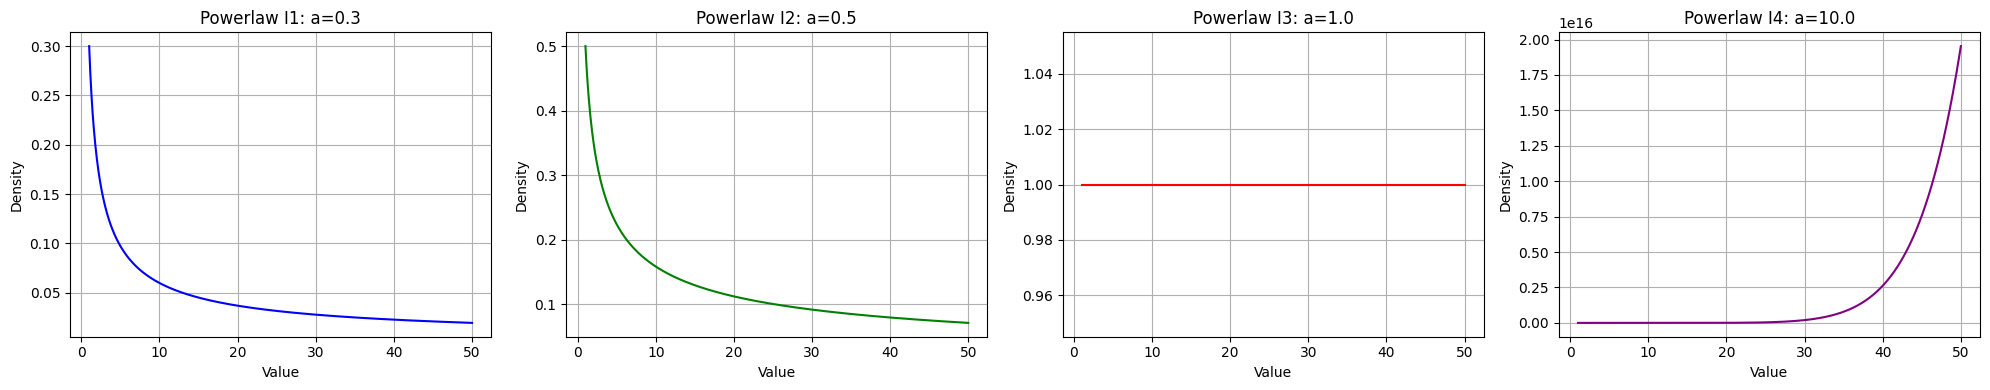

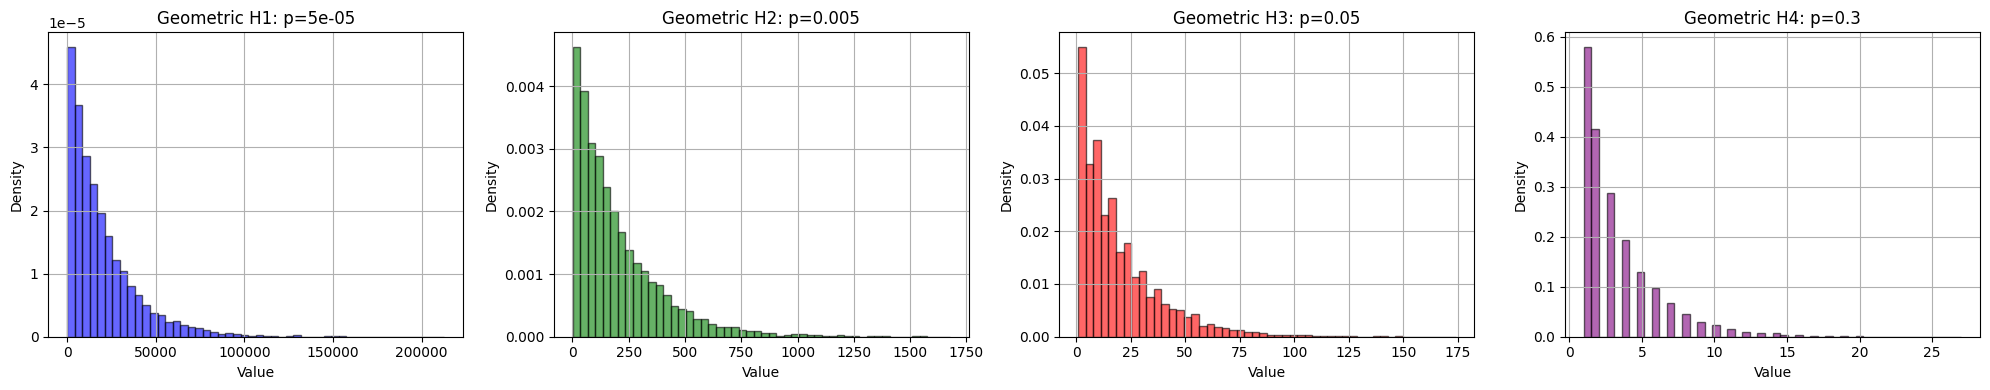

In [2]:
n_samples = 10000

# Generate Gaussian variations
gauss_params = [
    {'mean':5, 'sd':2},
    {'mean':10, 'sd':2},
    {'mean':5, 'sd':5},
    {'mean':0, 'sd':1}
]
B = [np.random.normal(p['mean'], p['sd'], n_samples) for p in gauss_params]

# Generate Powerlaw variations
powerlaw_params = [0.3, 0.5, 1.0, 10.0]
I = [powerlaw.rvs(a, size=n_samples) for a in powerlaw_params]

# Generate Geometric variations
geom_params = [0.00005, 0.005, 0.05, 0.3]
H = [geom.rvs(p, size=n_samples) for p in geom_params]

# Convert distributions to DataFrames
gauss_df = pd.DataFrame({f'B{i+1}': B[i] for i in range(4)})
powerlaw_df = pd.DataFrame({f'I{i+1}': I[i] for i in range(4)})
geometric_df = pd.DataFrame({f'H{i+1}': H[i] for i in range(4)})

# Function to plot distributions in a single row
def plot_distributions(data, titles, plot_type, x_vals=None, dist_params=None):
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    colors = ['blue', 'green', 'red', 'purple']
    
    for i, ax in enumerate(axes):
        if plot_type == 'line':
            ax.plot(x_vals, norm.pdf(x_vals, loc=dist_params[i]['mean'], scale=dist_params[i]['sd']), color=colors[i])
        elif plot_type == 'powerlaw':
            y_vals = dist_params[i] * (x_vals ** (dist_params[i] - 1))
            ax.plot(x_vals, y_vals, color=colors[i])
        else:
            ax.hist(data.iloc[:, i], bins=50, color=colors[i], alpha=0.6, edgecolor='black', density=True)
        
        ax.set_title(titles[i])
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate x values for smooth curves
x_gauss = np.linspace(-10, 20, 1000)
x_powerlaw = np.linspace(1, 50, 1000)

# Plot Gaussian distributions
plot_distributions(gauss_df, [f'Gaussian B{i+1}: μ={gauss_params[i]["mean"]}, σ={gauss_params[i]["sd"]}' for i in range(4)],
                    'line', x_gauss, gauss_params)

# Plot Power Law distributions
plot_distributions(powerlaw_df, [f'Powerlaw I{i+1}: a={powerlaw_params[i]}' for i in range(4)],
                    'powerlaw', x_powerlaw, powerlaw_params)

# Plot Geometric distributions
plot_distributions(geometric_df, [f'Geometric H{i+1}: p={geom_params[i]}' for i in range(4)], 'hist')

### Gaussian Distributions:
- The **mean (μ)** shifts the distribution horizontally.
- The **standard deviation (σ)** controls the spread:
  - A larger σ results in a wider and flatter curve.
  - A smaller σ makes the curve narrower and taller.

### Powerlaw Distributions:
- The parameter **a** determines the skewness and tail length:
  - Smaller a values result in highly skewed distributions with long tails.
  - Larger a values make the distribution more uniform.
  - For a = 0 It will give error as f(x) = 0 and x^-1 as x reaches 0 the value approaches to infinity
  - For a > 1, the higher value density will become more and the curve shape will shift to right


### Geometric Distributions:
- The parameter **p** controls the skewness and concentration of values near 0:
  - Smaller p values result in highly skewed distributions with long tails.
  - Larger p values reduce skewness and make the distribution more symmetric.


## 2. Compare above variables in single box plot

We'll create a box plot to compare the three original variables.

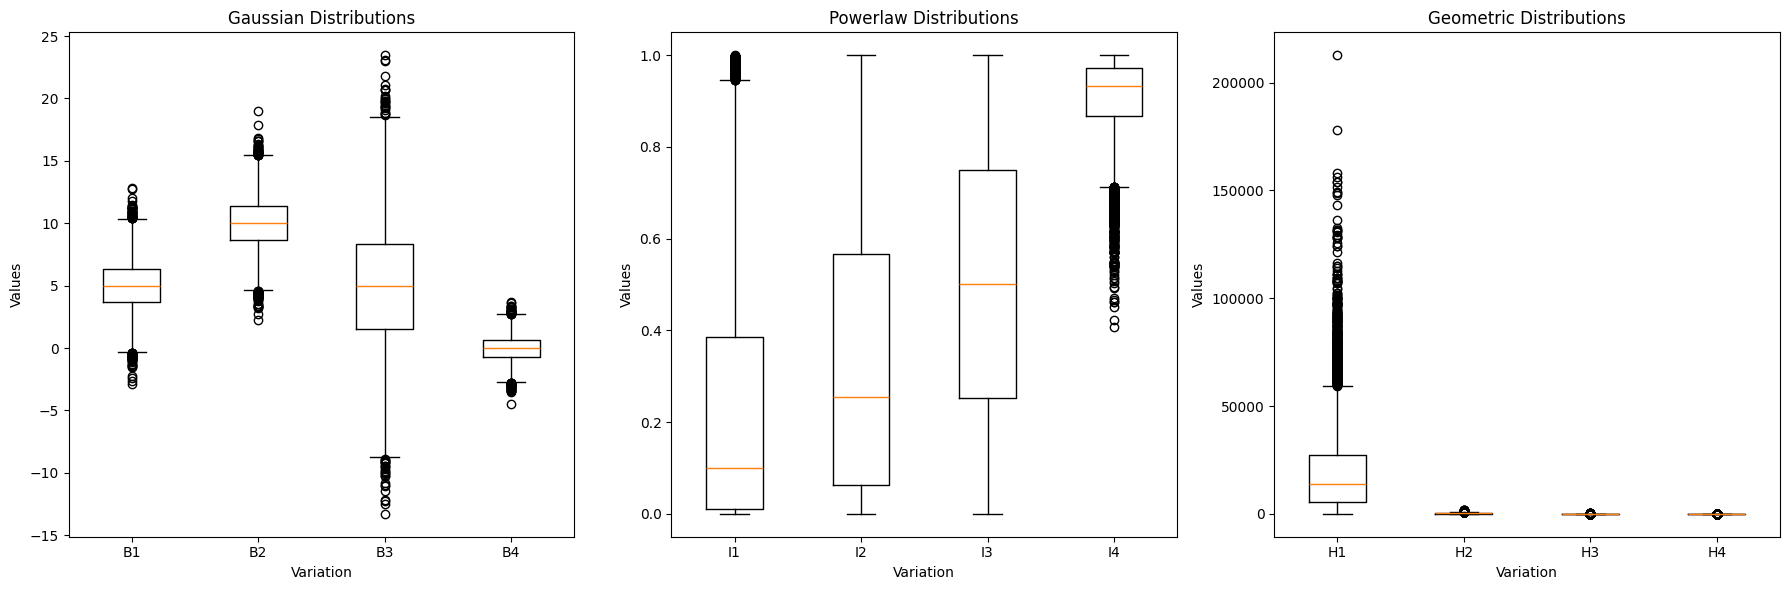

In [3]:
# Create box plots
plt.figure(figsize=(18, 6))

# Gaussian Box Plot
plt.subplot(1, 3, 1)
plt.boxplot(B, tick_labels=[f'B{i+1}' for i in range(4)])
plt.title('Gaussian Distributions')
plt.xlabel('Variation')
plt.ylabel('Values')

# Powerlaw Box Plot
plt.subplot(1, 3, 2)
plt.boxplot(I, tick_labels=[f'I{i+1}' for i in range(4)])
plt.title('Powerlaw Distributions')
plt.xlabel('Variation')
plt.ylabel('Values')

# Geometric Box Plot
plt.subplot(1, 3, 3)
plt.boxplot(H, tick_labels=[f'H{i+1}' for i in range(4)])
plt.title('Geometric Distributions')
plt.xlabel('Variation')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

### Box Plot for Gaussian Distributions (B):
- Each box represents one of the 4 Gaussian variations (B1, B2, B3, B4).
- The boxes show the median, quartiles, and outliers for each distribution.
- In box whiskers plot while changing the SD the width of the BOX increases on increasing the SD. And mean shifted in right and left as per the value.

### Box Plot for Powerlaw Distributions (I):
- Each box represents one of the 4 Powerlaw variations (I1, I2, I3, I4).
- The boxes highlight the skewness and spread of the distributions.
- In BoxPlot method of the Power law function as we go on increasing the value of p the left value outliers goes on increasing as there will be more higher values and as we go on decreasing the right value goes on increasing as lower value will be more as compared to higher values.
- For a=1 as the both value will be same the outliers will be on equi distance.

### Box Plot for Geometric Distributions (H):
- Each box represents one of the 4 Geometric variations (H1, H2, H3, H4).
- The boxes show the skewness and concentration of values near 0.
- Geometric distributions are typically right-skewed. This means that most of the data will fall on the left side of the plot, representing fewer trials to get the first success.
- For the smaller value of probability The box plot will likely show a short box and long whiskers on the right side and for the smaller value there will be less points on the whiskers as it requires very less trials to get the outcome.

## 3. Normalization Methods

We will define functions for each normalization method:

### (i) **Divide by Max**
Each value in the dataset is divided by the maximum value. This scales all values between 0 and 1, with the maximum value becoming 1, and all others proportionally smaller.

---

### (ii) **Divide by Sum**
Each value is divided by the sum of all values in the dataset. This ensures the sum of the values becomes 1, while keeping the proportions between them.

---

### (iii) **Z-score Normalization**
Each value is transformed by subtracting the mean and dividing by the standard deviation. This centers the data around 0 with a standard deviation of 1.

---

### (iv) **Convert to Percentages**
Each value is expressed as a percentage of the maximum value in the dataset, making the values range from 0% to 100%.

---

### (v) **Make Medians the Same**
The median of each variable is adjusted so that they all match a target median, which is the mean of the medians of all variables.

---

### (vi) **Quantile Normalization**
This method adjusts the distributions of different variables to match each other's quantiles, making their distributions have the same shape.


In [4]:
def normalize_by_max(x):
    return x / np.max(x)

def normalize_by_sum(x):
    return x / np.sum(x)

def normalize_zscore(x):
    return (x - np.mean(x)) / np.std(x)

def normalize_to_percentage(x):
    return 100 * (x / np.max(x))

def normalize_median(x, target_median):
    current_median = np.median(x)
    multiplier = target_median / current_median
    return x * multiplier

def quantile_normalize(x):
    # Reshape to 2D array since quantile_transform expects 2D input
    x_reshaped = x.reshape(-1, 1)
    x_qn = quantile_transform(x_reshaped, n_quantiles=1000, output_distribution='uniform', copy=True)
    return x_qn.flatten()

### 3a. Compute Normalized Variables Using Each Method

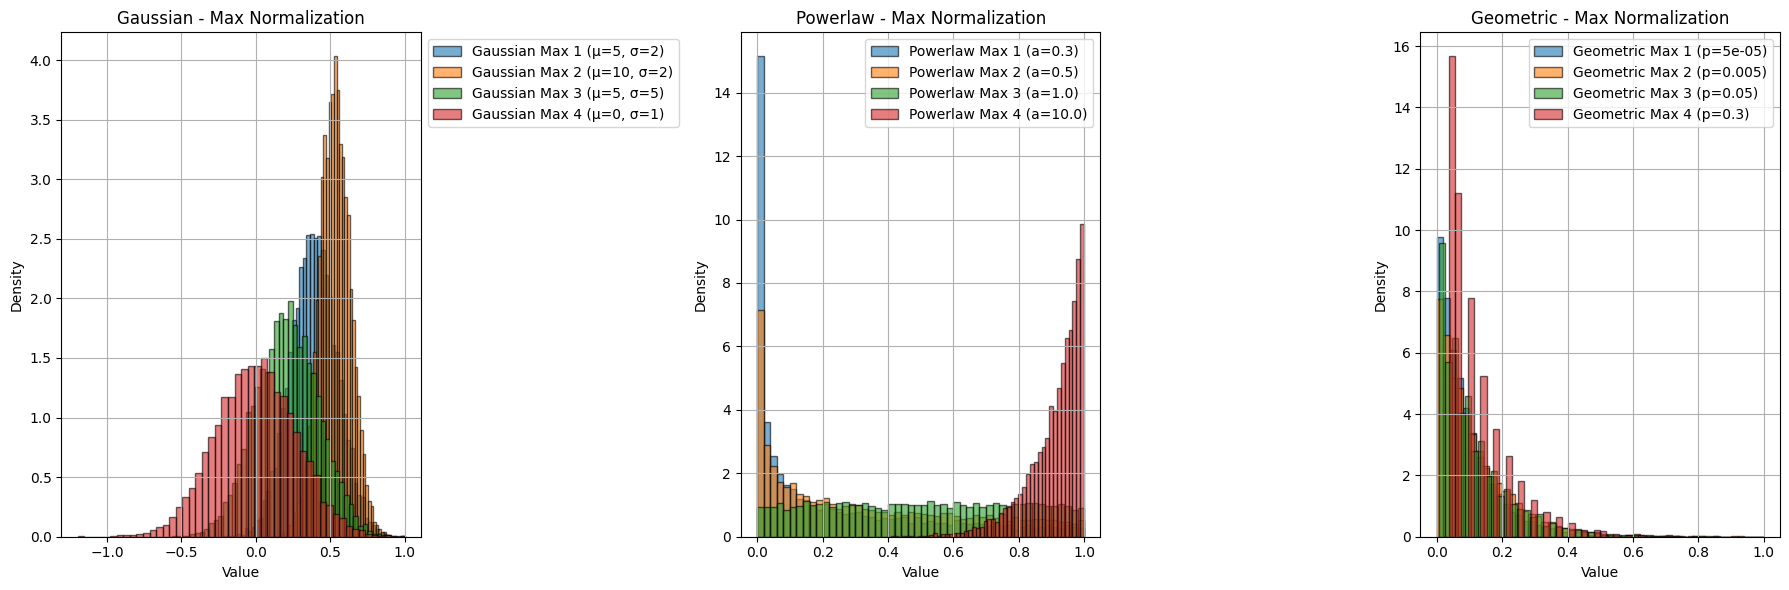

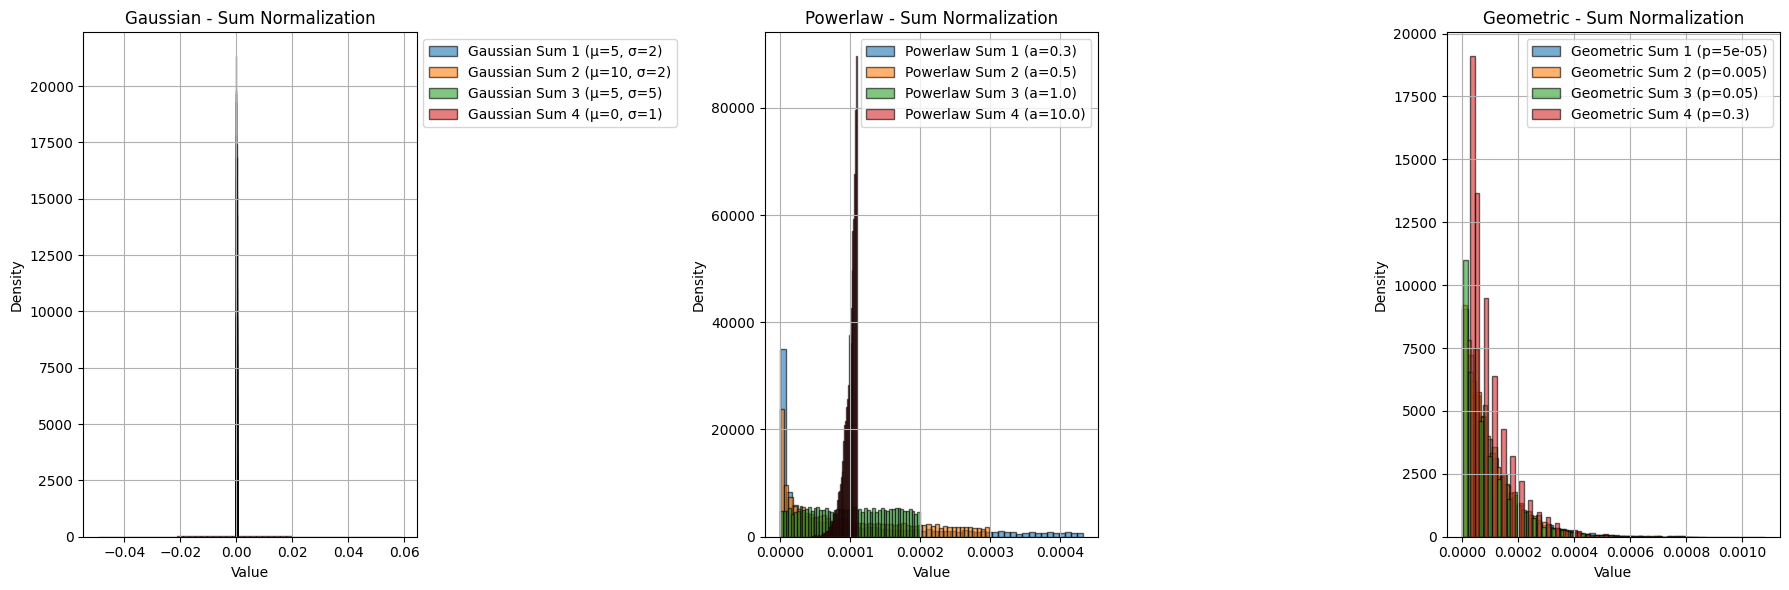

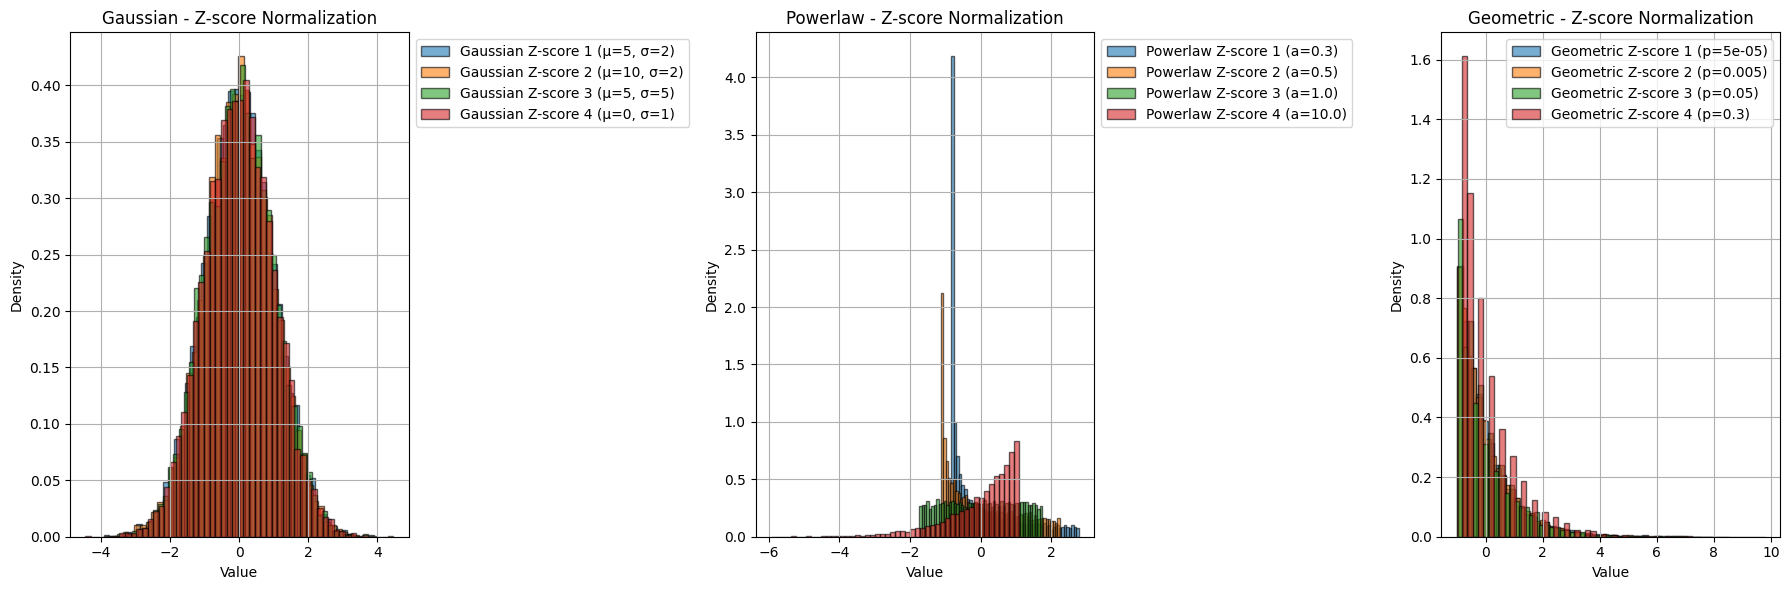

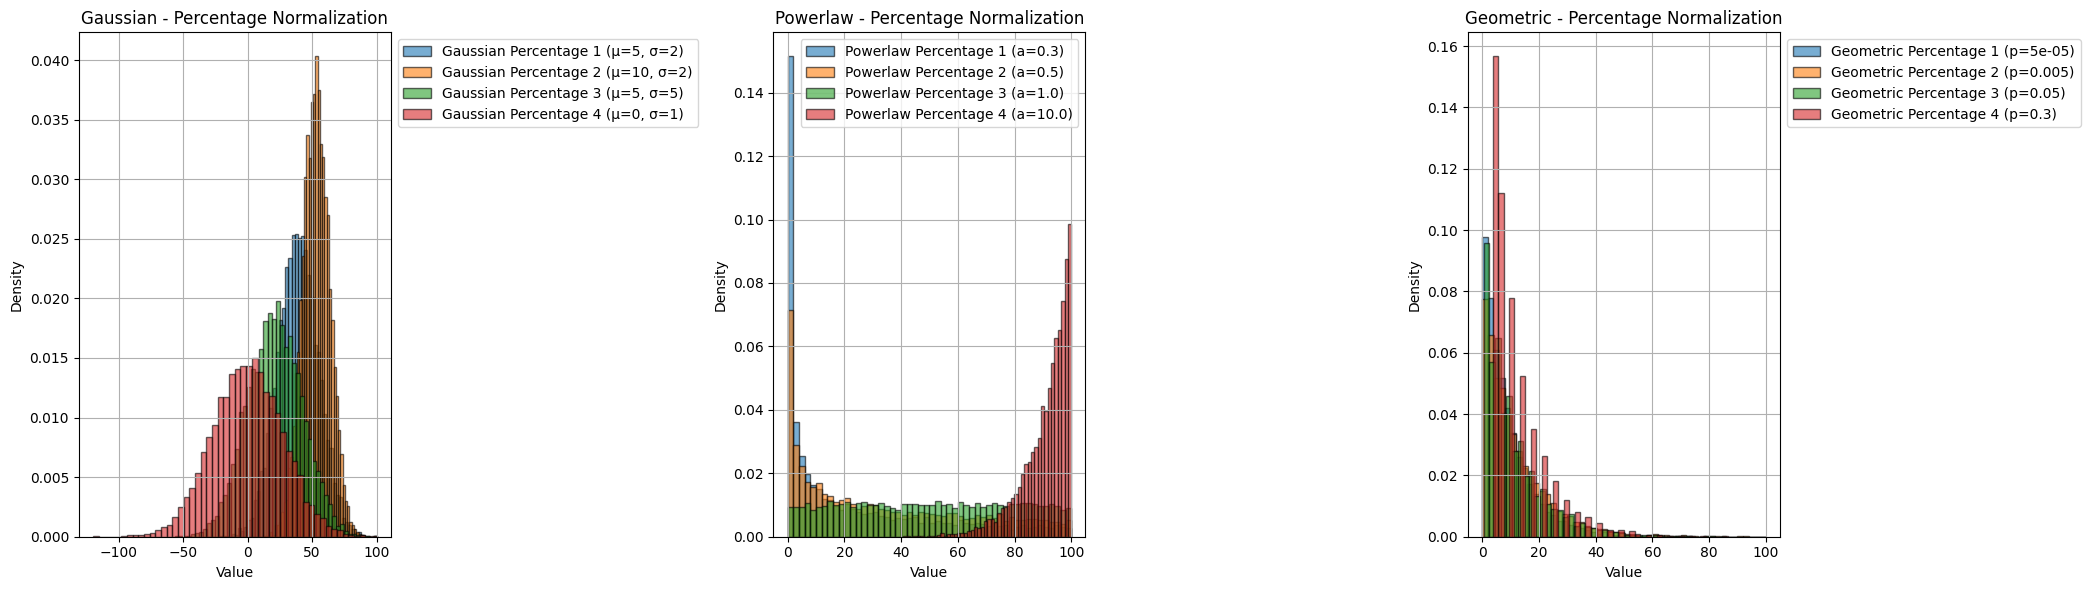

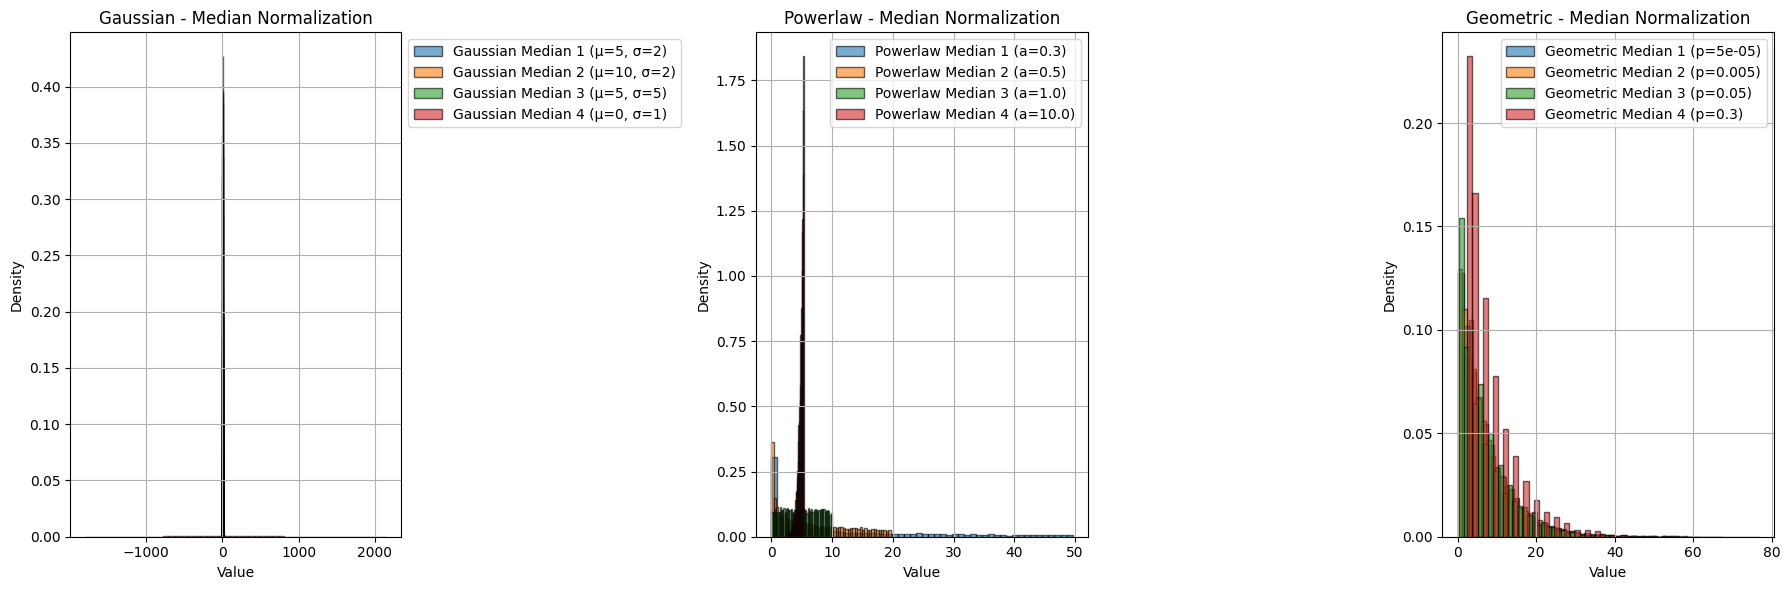

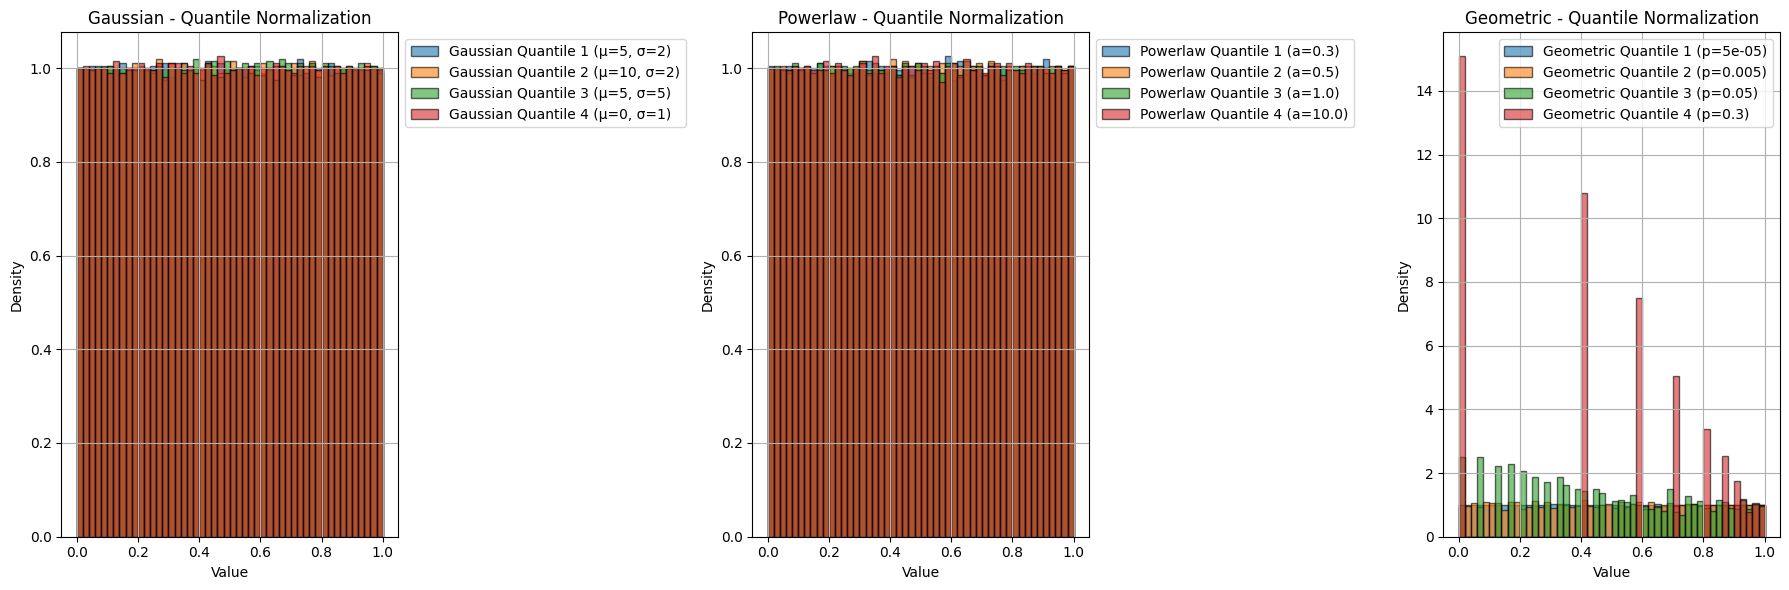

In [5]:
# Normalization - Apply methods to distributions
B_norm_max = [normalize_by_max(b) for b in B]
I_norm_max = [normalize_by_max(i) for i in I]
H_norm_max = [normalize_by_max(h) for h in H]

B_norm_sum = [normalize_by_sum(b) for b in B]
I_norm_sum = [normalize_by_sum(i) for i in I]
H_norm_sum = [normalize_by_sum(h) for h in H]

B_zscore = [normalize_zscore(b) for b in B]
I_zscore = [normalize_zscore(i) for i in I]
H_zscore = [normalize_zscore(h) for h in H]

B_percent = [normalize_to_percentage(b) for b in B]
I_percent = [normalize_to_percentage(i) for i in I]
H_percent = [normalize_to_percentage(h) for h in H]

# Calculate target median for median normalization
target_median = np.mean([np.median(b) for b in B])  # Using B as an example, can also take median from I and H

B_median_norm = [normalize_median(b, target_median) for b in B]
I_median_norm = [normalize_median(i, target_median) for i in I]
H_median_norm = [normalize_median(h, target_median) for h in H]

# Apply quantile normalization
B_qn = [quantile_normalize(b) for b in B]
I_qn = [quantile_normalize(i) for i in I]
H_qn = [quantile_normalize(h) for h in H]

def plot_normalized_distributions(normalized_data, titles, methods, x_vals=None, dist_params=None):
    # Loop through each method to create a separate plot for each method of normalization
    for i, method in enumerate(methods):
        # Create a figure for each method of normalization, 1 row for each (Gaussian, Powerlaw, Geometric)
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the distributions

        # Loop through each distribution type (Gaussian, Powerlaw, Geometric)
        for j, dist_type in enumerate(titles):
            ax = axes[j]
            colors = ['blue', 'green', 'red', 'purple']

            # Loop through all variations of the current distribution type
            for k, variation in enumerate(normalized_data[method][j]):
                if dist_type == 'Gaussian':
                    # For Gaussian, plot histograms with density
                    param_str = f"{dist_type} {method} {k+1} (μ={dist_params[j][k]['mean']}, σ={dist_params[j][k]['sd']})"
                    ax.hist(variation, bins=50, alpha=0.6, label=param_str, edgecolor='black', density=True)
                elif dist_type == 'Powerlaw':
                    # For Powerlaw, plot histograms with density
                    param_str = f"{dist_type} {method} {k+1} (a={powerlaw_params[k]})"
                    ax.hist(variation, bins=50, alpha=0.6, label=param_str, edgecolor='black', density=True)
                else:
                    # For Geometric, plot histograms with density
                    param_str = f"{dist_type} {method} {k+1} (p={geom_params[k]})"
                    ax.hist(variation, bins=50, alpha=0.6, label=param_str, edgecolor='black', density=True)

            # Set titles, labels, and legends
            ax.set_title(f"{dist_type} - {method} Normalization")
            ax.set_xlabel("Value")
            ax.set_ylabel("Density")
            ax.legend(loc='best', bbox_to_anchor=(1, 1))
            ax.grid(True)

        plt.tight_layout()
        plt.show()

# Methods and distribution types
methods = ['Max', 'Sum', 'Z-score', 'Percentage', 'Median', 'Quantile']
titles = ['Gaussian', 'Powerlaw', 'Geometric']

# Normalized data
normalized_data = {
    "Max": [B_norm_max, I_norm_max, H_norm_max],
    "Sum": [B_norm_sum, I_norm_sum, H_norm_sum],
    "Z-score": [B_zscore, I_zscore, H_zscore],
    "Percentage": [B_percent, I_percent, H_percent],
    "Median": [B_median_norm, I_median_norm, H_median_norm],
    "Quantile": [B_qn, I_qn, H_qn]
}

# Plot all normalized distributions
plot_normalized_distributions(normalized_data, titles, methods, x_vals=x_gauss, dist_params=[gauss_params, powerlaw_params, geom_params])

### **Normalized Distributions Observations**

1. **Normalization by Max:**
   - **Gaussian (B)**: After scaling, the distribution now falls within the range of 0 to 1. The highest value is set to 1, and all other values are scaled proportionally. The curve still looks Gaussian, but the values are compressed.
   - **Powerlaw (I)**: The distribution is scaled to fit between 0 and 1, but the heavy tail is still present, though more compact. The overall shape is less stretched but retains the power law characteristic.
   - **Geometric (H)**: The values now range between 0 and 1. The distribution still shows a skew, but it’s more compact. The overall shape is adjusted to fit the new scale.

2. **Normalization by Sum:**
   - **Gaussian (B)**: The values now sum to 1, which makes the data more compact. The distribution still resembles a Gaussian, but it’s now normalized in scale, making it more balanced across the range.
   - **Powerlaw (I)**: With a sum of 1, the power law tail is a bit less extreme, though the characteristic shape remains. The distribution now appears less stretched.
   - **Geometric (H)**: The values are compressed so that the sum equals 1, leading to a more uniform appearance. The values are closer together, but the skewness is still there.

3. **Z-score Normalization:**
   - **Gaussian (B)**: The values are now centered around 0, with a standard deviation of 1. The shape remains Gaussian, but the distribution is shifted and scaled, making the data easier to compare across distributions.
   - **Powerlaw (I)**: The power law still has its heavy tail, but now the distribution is centered around 0, making it easier to spot differences compared to the original.
   - **Geometric (H)**: The values are shifted to have a mean of 0 and a standard deviation of 1. While the shape still shows skewness, the centrality of the data is adjusted.

4. **Normalization by Percentage:**
   - **Gaussian (B)**: Now scaled as a percentage, the values range between 0% and 100%. The overall shape remains Gaussian, but the scale is adjusted, making it easier to interpret as relative values.
   - **Powerlaw (I)**: The extreme values in the tail are less influential, but the power law shape is still visible. The values are compressed into the [0%, 100%] range.
   - **Geometric (H)**: The values are scaled from 0% to 100%, making the distribution more uniform. The skew is still there but less pronounced.

5. **Normalization by Median:**
   - **Gaussian (B)**: The distribution is adjusted such that the median is the same across variables. The shape still looks Gaussian, but now the central tendency is shared among the data points.
   - **Powerlaw (I)**: The distribution has been adjusted to have the same median, making the heavy tail less pronounced. The overall distribution appears more balanced.
   - **Geometric (H)**: The central tendency is adjusted, and while the skewness remains, the values are more proportionate compared to the original.

6. **Quantile Normalization:**
   - **Gaussian (B)**: After quantile normalization, the Gaussian distribution now aligns with others in terms of quantiles, but the bell-curve shape is preserved.
   - **Powerlaw (I)**: The power law’s heavy tail has been adjusted, making the distribution align more closely with others in terms of quantiles. The shape is still heavy-tailed but more compact.
   - **Geometric (H)**: The distribution aligns more closely with the others in terms of quantiles, but the skew remains. The values are more spread out, but the central tendency is similar.

## 4. Compare Original vs. Normalized Distributions and Box Plots

For each normalization method, we will:
Plot a combined box plot for the normalized variables.

Below is a helper function to create the histogram comparisons.

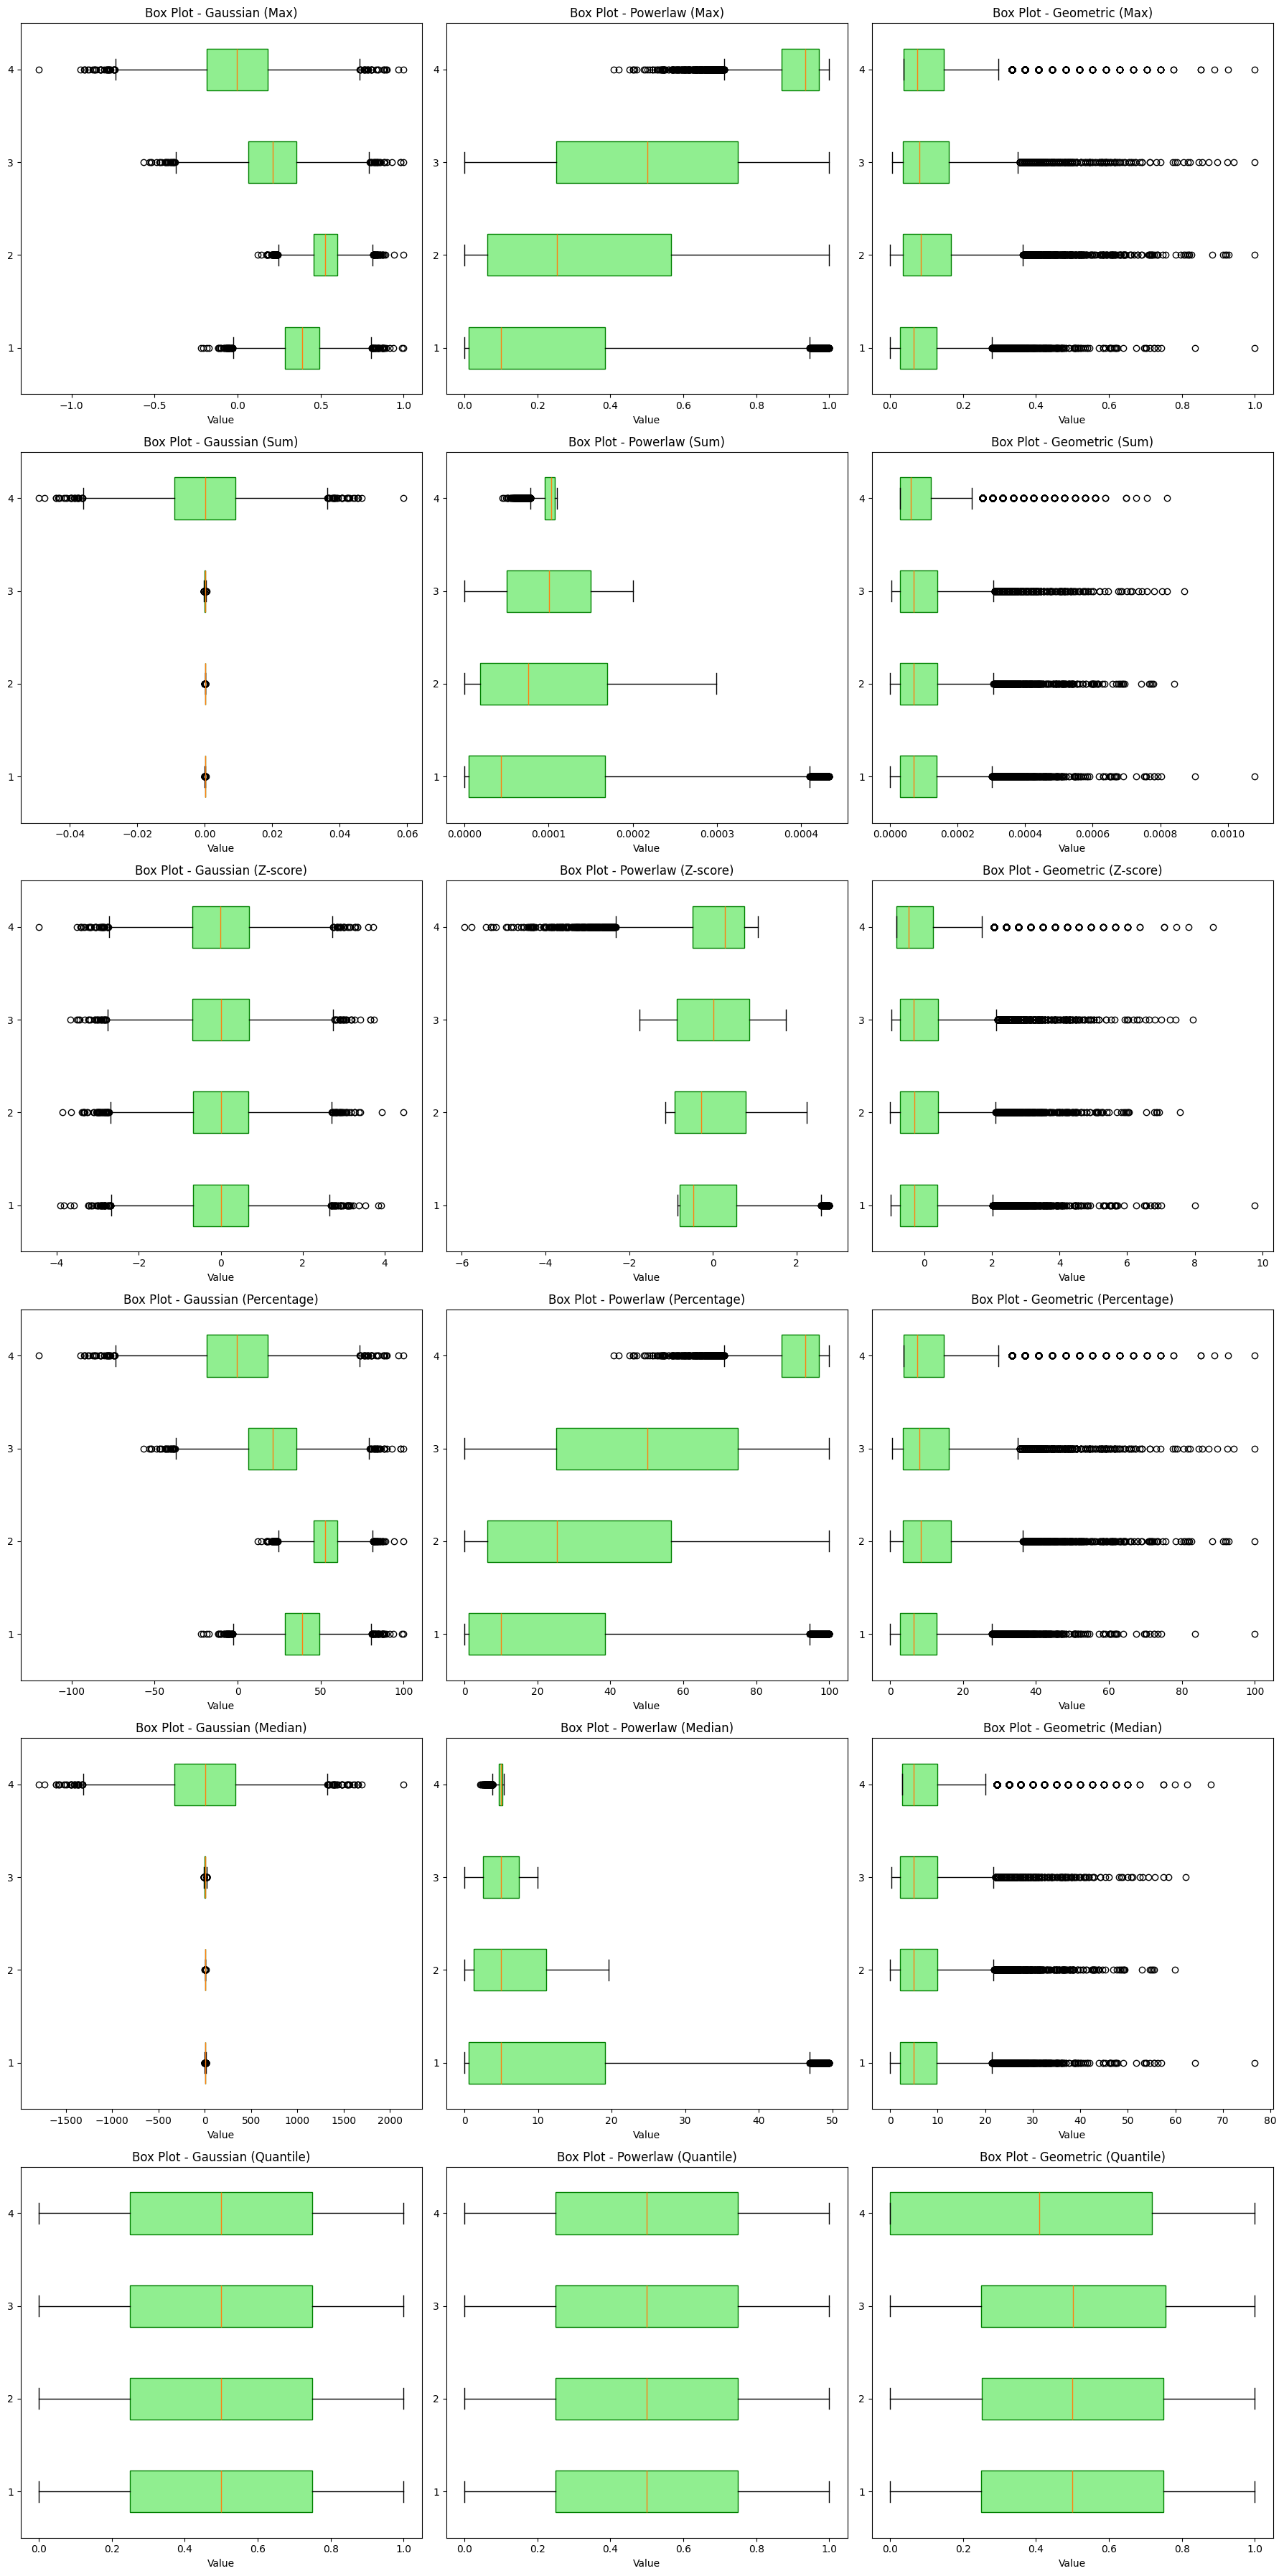

In [6]:
import matplotlib.pyplot as plt

def plot_comparison(original_data, normalized_data, method_name, dist_type, ax):
    # Plotting box plot for the normalized distributions
    ax.boxplot(normalized_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
    ax.set_title(f"Box Plot - {dist_type} ({method_name})")
    ax.set_xlabel("Value")
    
# Creating a grid for 3 plots per row
fig, axes = plt.subplots(len(methods), 3, figsize=(18, len(methods)*6))

# Plotting for each normalization method and distribution
for row_idx, method in enumerate(methods):
    for col_idx, dist_type in enumerate(titles):
        ax = axes[row_idx, col_idx]  # Select the current subplot axis
        normalized_data_for_method = normalized_data[method][col_idx]
        plot_comparison(None, normalized_data_for_method, method, dist_type, ax)

plt.tight_layout()
plt.show()

### **Box Plot Observations**

1. **Normalization by Max:**
   - **Gaussian (B)**: The box plot shows that all values fall between 0 and 1, with the interquartile range (IQR) being narrow. This indicates that the data has been compressed due to the max normalization.
   - **Powerlaw (I)**: The box plot reveals that the distribution is compressed, with a few outliers toward the upper end. This reflects the power law’s heavy tail, even after scaling.
   - **Geometric (H)**: The IQR is relatively wide, but the values are still compressed. The skewness is present, and the upper outliers are pushed towards the higher end.

2. **Normalization by Sum:**
   - **Gaussian (B)**: The IQR is narrower than before, as the values are compressed to ensure the sum equals 1. The median is now centered around 0.33, giving a more balanced view of the data.
   - **Powerlaw (I)**: The IQR is compressed, and the outliers are less pronounced. The distribution appears more centered compared to the original.
   - **Geometric (H)**: The distribution is more evenly spread within the [0, 1] range, but the skewness is still noticeable. The IQR is narrower, indicating a more uniform spread.

3. **Z-score Normalization:**
   - **Gaussian (B)**: The box plot shows the distribution centered around 0 with a standard deviation of 1. The IQR is wider, reflecting the Z-score transformation and the spread of values.
   - **Powerlaw (I)**: The values are centered around 0, but the IQR is wider compared to the max and sum normalizations. The heavy tail is still present but adjusted.
   - **Geometric (H)**: The IQR is spread out, and the distribution is centered around 0, but the skew remains visible. The values are now adjusted to fit the new scale.

4. **Normalization by Percentage:**
   - **Gaussian (B)**: The box plot shows that the values are compressed into the [0%, 100%] range, with the IQR being narrow. The values are more evenly distributed across this range.
   - **Powerlaw (I)**: The box plot reveals that most of the data is compressed, with the outliers still visible at the higher end. The percentage transformation reduces the influence of extreme values.
   - **Geometric (H)**: The values are more evenly spread between 0% and 100%, but the skew is still visible. The distribution appears less extreme.

5. **Normalization by Median:**
   - **Gaussian (B)**: The median is adjusted, and the IQR is narrower than the original, indicating the normalization effect. The central tendency is now shared across the distributions.
   - **Powerlaw (I)**: The box plot shows that the IQR is more centralized, and the extreme outliers are reduced. The distribution is more balanced around the median.
   - **Geometric (H)**: The IQR is narrower, with the skewness still present but reduced. The values are more balanced, but the distribution retains its original characteristics.

6. **Quantile Normalization:**
   - **Gaussian (B)**: The box plot shows that the distribution is aligned with the others in terms of quantiles. The IQR is more consistent, and the values are distributed evenly.
   - **Powerlaw (I)**: The box plot shows that the power law's heavy tail has been adjusted, and the IQR is now more consistent with the other distributions.
   - **Geometric (H)**: The box plot indicates that the values are more aligned with the other distributions, but the skew remains visible. The IQR has been adjusted to match the quantiles of other distributions.